In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import skimage.io as io
from skimage.morphology import binary_erosion, erosion, dilation, disk

In [2]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 15), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax1.set_adjustable('box-forced')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    ax2.set_adjustable('box-forced')

In [3]:
def mutual_information(im1, im2):
    # assumes images contain integer values in [0,255]
    X = im1.astype(float)
    Y = im2.astype(float)
    hist_2d, _, _ = np.histogram2d(X.ravel(),Y.ravel(),bins=255)
    pxy = hist_2d / float(np.sum(hist_2d)) # joint probability distribution
    
    px = np.sum(pxy, axis=1) # marginal distribution for x over y
    py = np.sum(pxy, axis=0) # marginal distribution for y over x
    
    Hx = - sum(px*np.log(px + (px==0))) # Entropy of X
    Hy = - sum(py*np.log(py + (py==0))) # Entropy of Y
    Hxy = np.sum(-(pxy*np.log(pxy+(pxy==0))).ravel())# Joint Entropy
    
    
    M = Hx+Hy-Hxy # mutual information
    nmi = 2*(M/(Hx+Hy)) # normalized mutual information
    return nmi

In [5]:
im1 = io.imread('../../data/train_1st_manual/21_manual1.gif')
im2 = io.imread('../../data/train_1st_manual/35_manual1.gif')
# im3 = io.imread('v1.png')

In [4]:
im1 = io.imread('v_unmarked.png')
im2 = io.imread('veroded_unmarked.png')
print(mutual_information(im1,im2))

0.90486586052


In [6]:
im1 = io.imread('patch_1.png')
im2 = io.imread('eroded_patch_1.png')
print(mutual_information(im1,im2))

0.392806106152


In [7]:
im1 = io.imread('patch_2.png')
im2 = io.imread('eroded_patch_2.png')
print(mutual_information(im1,im2))

0.239819663046


In [5]:
im1 = io.imread('patch_3.png')
im2 = io.imread('eroded_patch_3.png')
print(mutual_information(im1,im2))

0.456927497263


In [6]:
print('Is mutual information commutative?')
print(mutual_information(im1,im2), mutual_information(im2,im1))

Is mutual information commutative?
0.01207404722 0.01207404722


In [7]:
print('Is mutual information the identity for the same images?')
print(mutual_information(im1,im1))

Is mutual information the identity for the same images?
1.0


In [8]:
print('Worst case, you segment nothing, what happens?')
print(mutual_information(im1,np.zeros(im1.shape)))

Worst case, you segment nothing, what happens?
0.0


In [11]:
print('Worst case, you segment everyhing, what happens?')
print(mutual_information(im1,255*np.ones(im1.shape)))

Worst case, you segment everyhing, what happens?
0.0


In [29]:
print('Worst case, you segment the complement, what happens?')
print(mutual_information(im1,255-im1))

Worst case, you segment the complement, what happens?
1.0


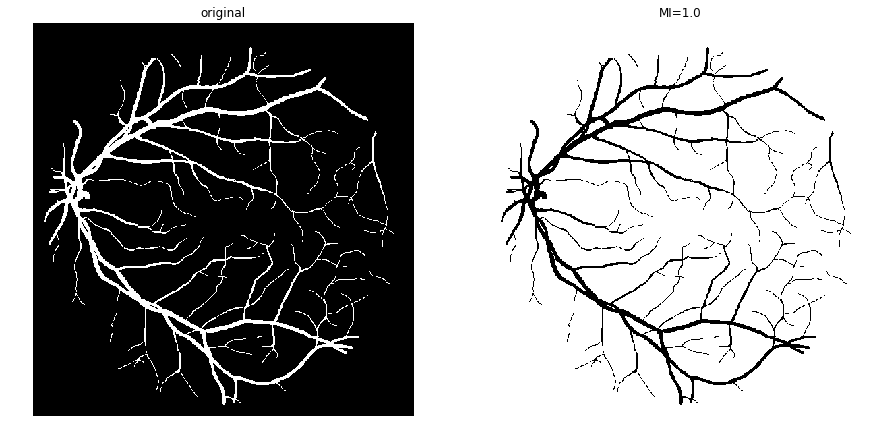

In [30]:
plot_comparison(im1, 255-im1, 'MI='+str(mutual_information(im1,255-im1)))

Does mutual information make sense? (I)


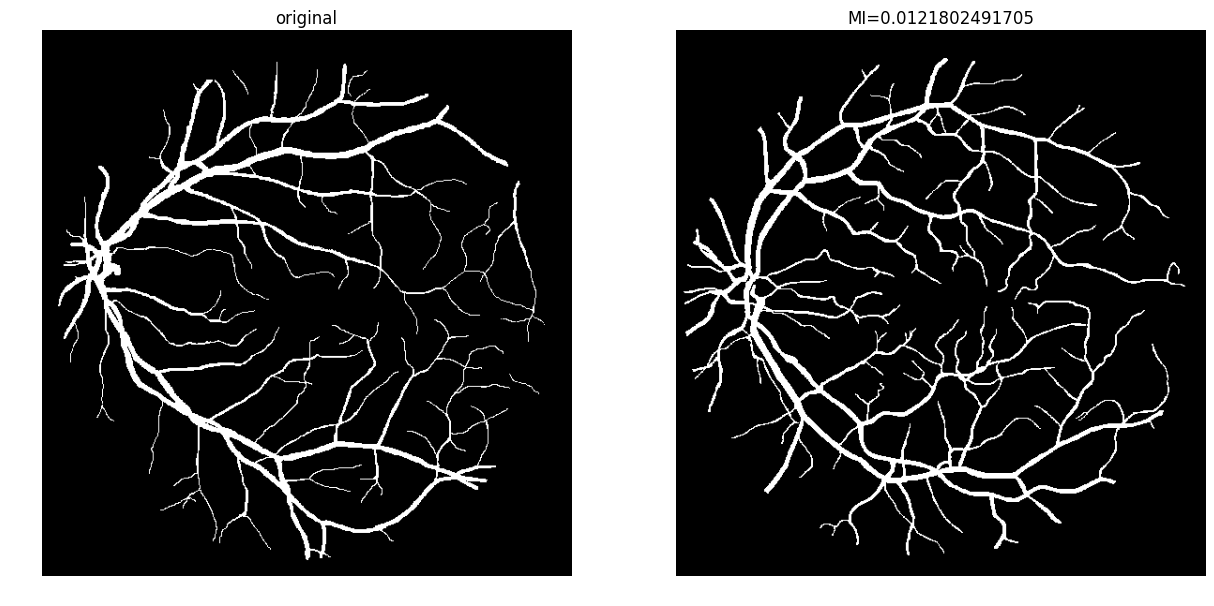

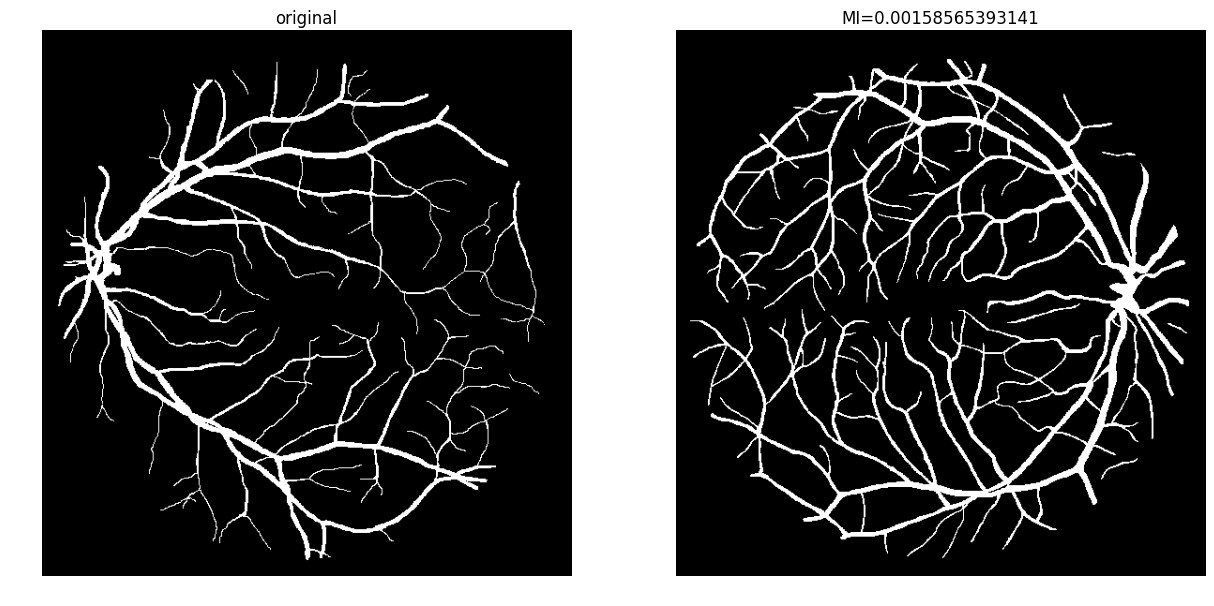

In [10]:
print('Does mutual information make sense? (I)')
plot_comparison(im1, im2, 'MI='+str(mutual_information(im1,im2)))
plot_comparison(im1, im3, 'MI='+str(mutual_information(im1,im3)))

In [11]:
print('Does mutual information make sense? (II)')
vessel = io.imread('21_manual1.gif')
mask = io.imread('21_training_mask.gif')

Does mutual information make sense? (II)


In [5]:
from skimage.util import random_noise

In [6]:
selem = disk(1)

In [7]:
selem

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

(584, 565)


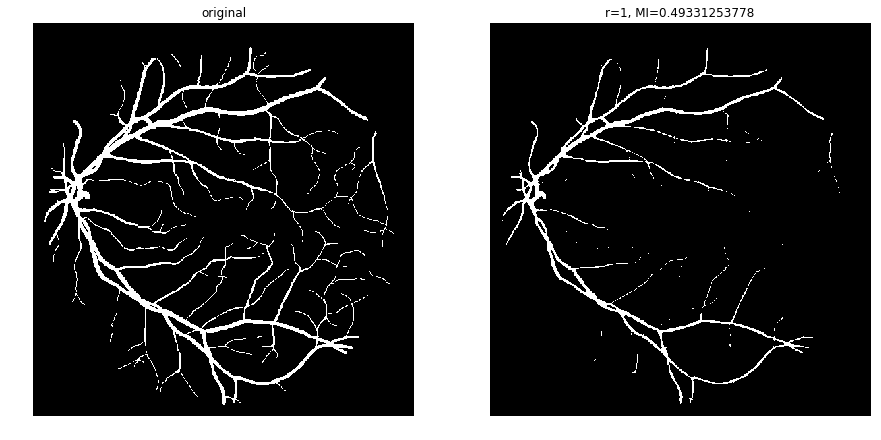

In [11]:
radius = 1
print(im1.shape)
eroded = binary_erosion(im1, selem = disk(radius))
plot_comparison(im1, eroded, 'r=1, MI='+str(mutual_information(im1,eroded)))

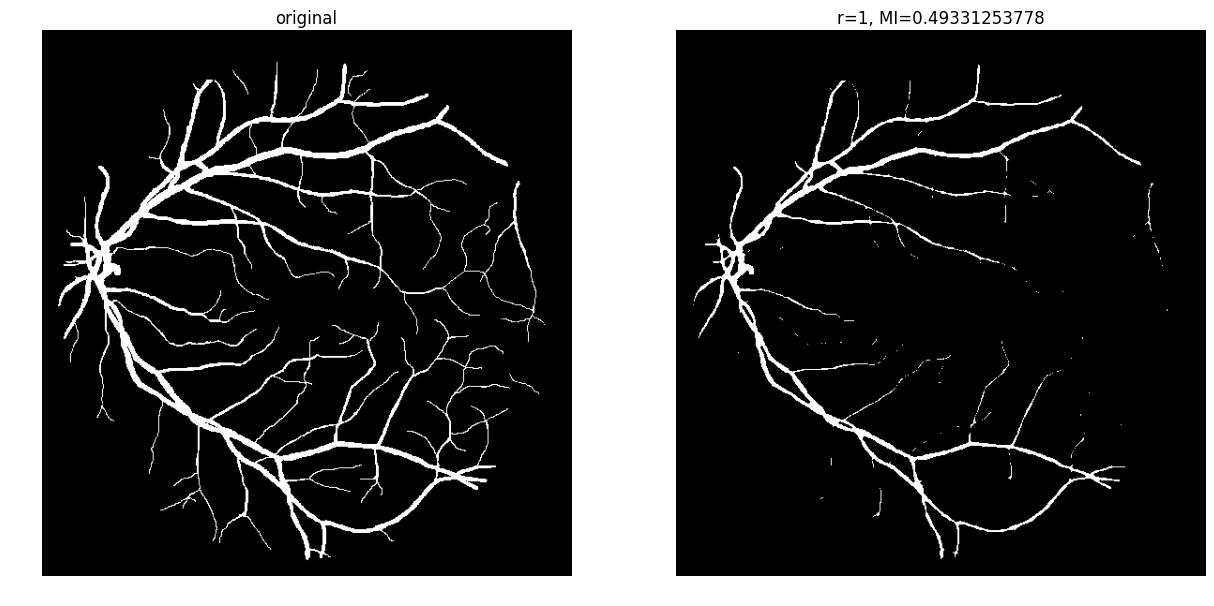

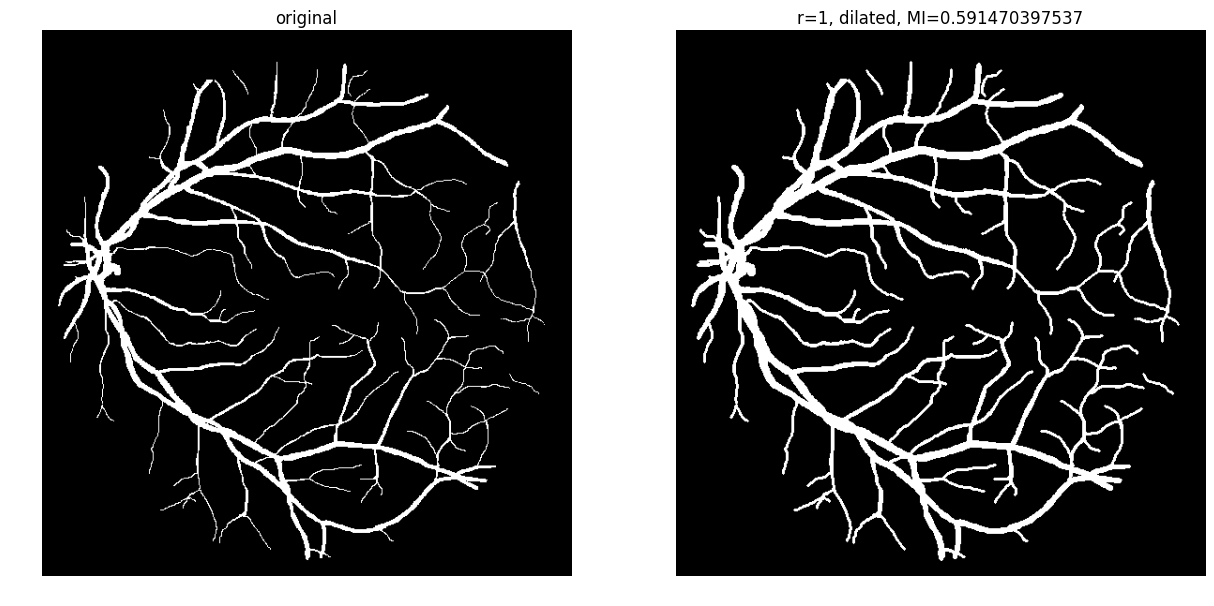

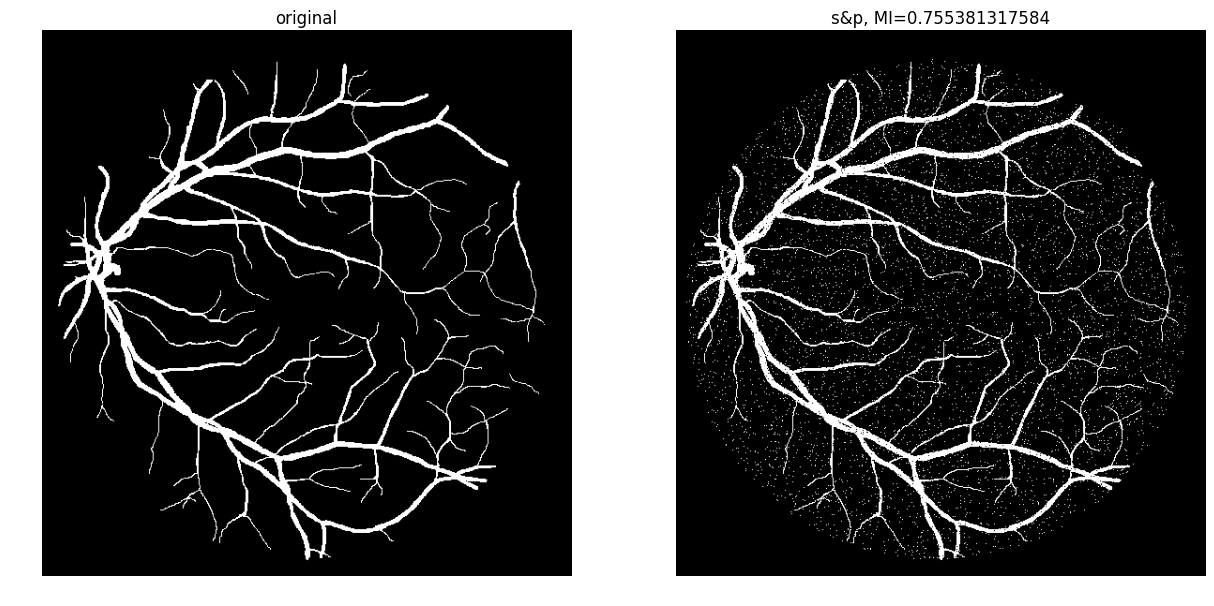

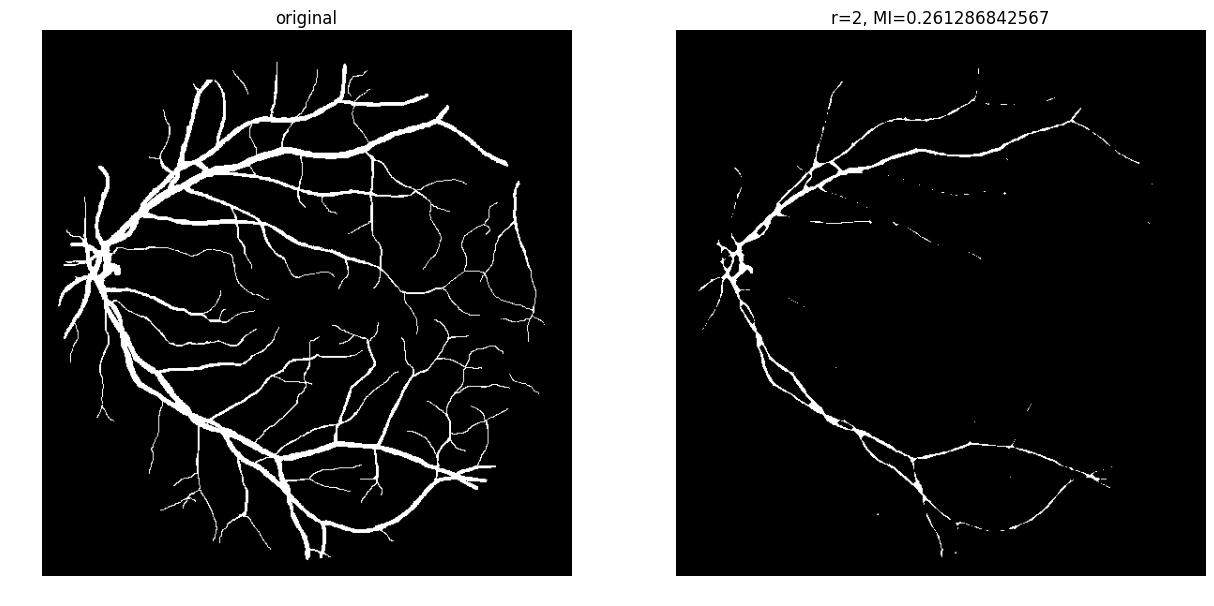

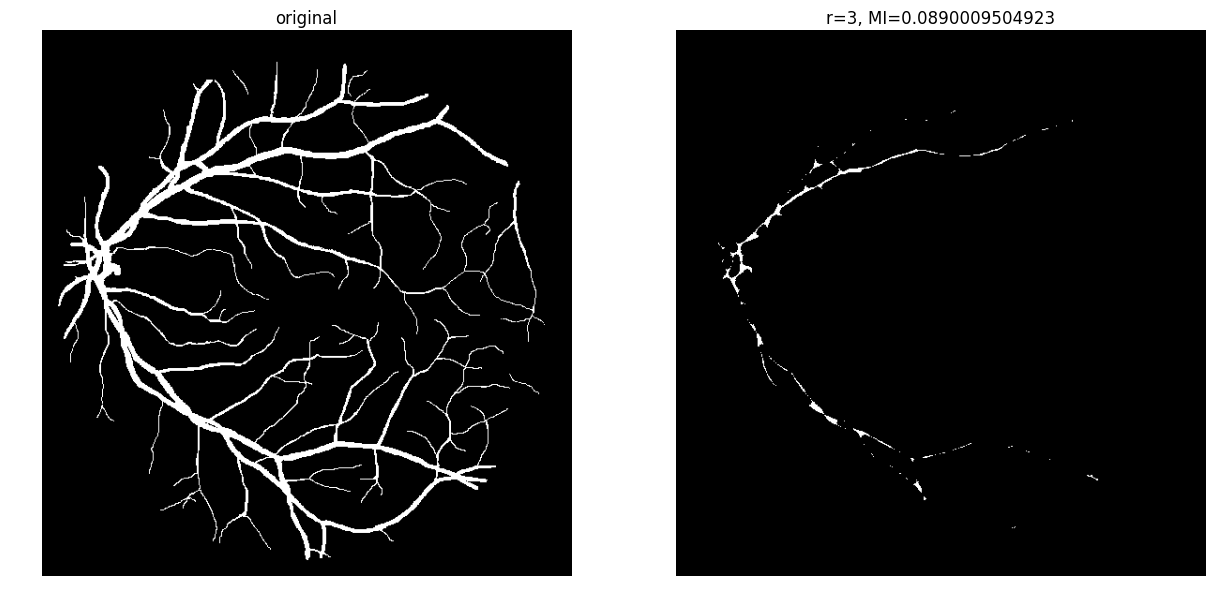

In [46]:
radius = 1
eroded = binary_erosion(vessel, selem = disk(radius))
plot_comparison(vessel, eroded, 'r=1, MI='+str(mutual_information(vessel,eroded)))

radius = 1
dilated = dilation(vessel, selem = disk(radius))
plot_comparison(vessel, dilated, 'r=1, dilated, MI='+str(mutual_information(vessel,dilated)))

noised = random_noise(vessel, mode='s&p', salt_vs_pepper =0.50)*mask
plot_comparison(vessel, noised, 's&p, MI='+str(mutual_information(vessel,noised)))

radius = 2
more_eroded = binary_erosion(vessel, selem = disk(radius))
plot_comparison(vessel, more_eroded, 'r=2, MI='+str(mutual_information(vessel,more_eroded)))

radius = 3
most_eroded = binary_erosion(vessel, selem = disk(radius))
plot_comparison(vessel, most_eroded, 'r=3, MI='+str(mutual_information(vessel,most_eroded)))

## Random Local Erosions over windows across the image

In [20]:
n_rows, n_cols = vessel.shape
vessel_coords = np.where(vessel)
num_vessel_pixels = vessel_coords[0].size
center_indexes = np.random.randint(0,num_vessel_pixels,50)

In [21]:
center_idx = np.random.choice(center_indexes.size,replace = False)
center = vessel_coords[0][center_indexes[center_idx]],vessel_coords[1][center_indexes[center_idx]]
window_size = np.random.randint(10, 100)

In [22]:
window = vessel[np.maximum(0,center[0]-window_size):np.minimum(center[0]+window_size, n_cols),
                np.maximum(0,center[1]-window_size):np.minimum(center[1]+window_size, n_cols)]
print(center, window_size)

(536, 337) 58


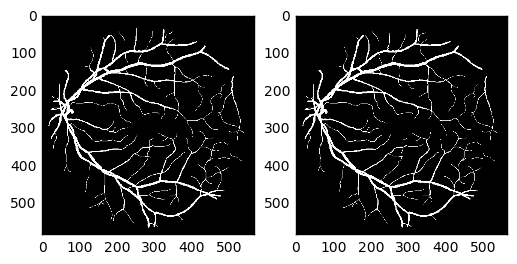

In [37]:
radius=1
eroded_window = binary_erosion(window, selem = disk(radius))
eroded_vessel = vessel.copy()
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(eroded_vessel, cmap='gray')
ax[1].imshow(vessel, cmap='gray')
plt.show()

### Turns out sklearn does sth similar already

In [24]:
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_mutual_info_score

In [25]:
normalized_mutual_info_score(window.ravel(), eroded_window.ravel())

0.48464750846822857

In [26]:
adjusted_mutual_info_score(window.ravel(), eroded_window.ravel())

0.37175774285427737

In [27]:
mutual_information(window, eroded_window)

0.46812280370346449

In [38]:
eroded_vessel[np.maximum(0,center[0]-window_size):np.minimum(center[0]+window_size, n_cols),
                np.maximum(0,center[1]-window_size):np.minimum(center[1]+window_size, n_cols)] = eroded_window

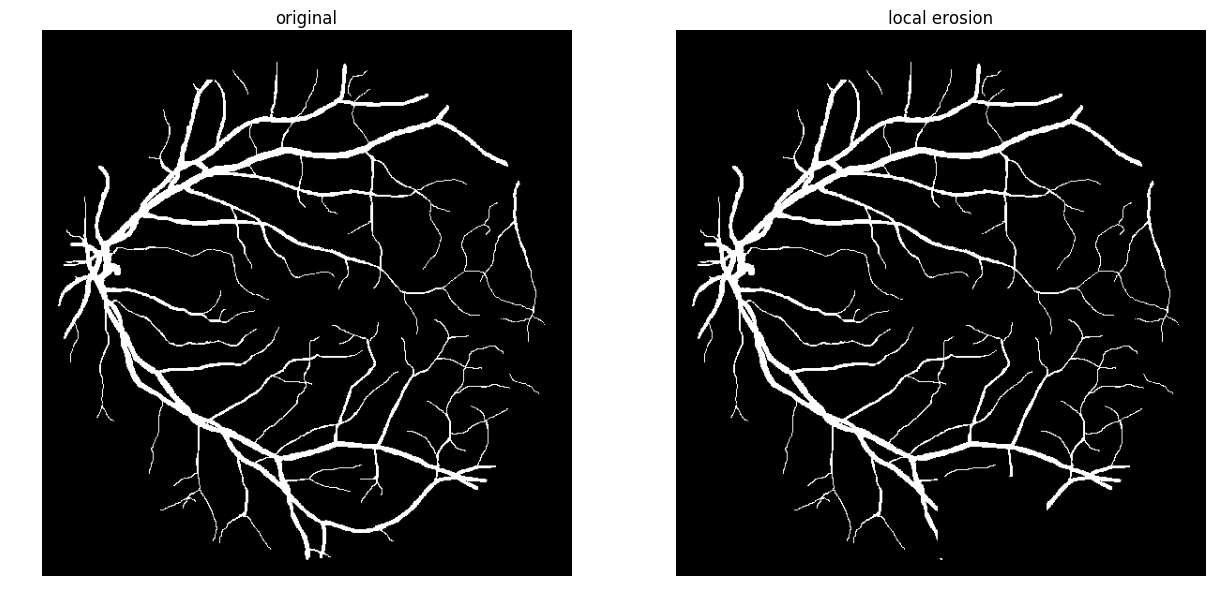

In [39]:
plot_comparison(vessel, eroded_vessel, 'local erosion')

In [40]:
normalized_mutual_info_score(vessel.ravel(), eroded_vessel.ravel())

0.94758352190727868

In [41]:
soft_segmentation = io.imread('soft_segmentation.png')
ground_truth = io.imread('21_manual1.gif').astype(bool)
mask = io.imread('21_training_mask.gif').astype(bool)

In [43]:
segmentation = soft_segmentation>37

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
thresholds = [33,34,35,36,37,38,39,40,41,43]
for i in range(len(thresholds)):
    threshold = thresholds[i]
    segmentation = soft_segmentation>threshold
    gt = np.ravel(ground_truth[mask==True])
    preds = np.ravel(segmentation[mask==True])
    
    
    
    vessel_pixels = np.count_nonzero(gt)
    total_pixels = np.count_nonzero(mask)
    non_vessel_pixels = total_pixels-vessel_pixels
    
    tp = np.count_nonzero(preds & gt)
    tn = np.count_nonzero(np.logical_not(preds) & np.logical_not(gt))
    fp = np.count_nonzero(preds & np.logical_not(gt))
    fn = np.count_nonzero(np.logical_not(preds) & gt)
    
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    
    balanced_accuracy = 0.5*(sensitivity+specificity)
    
    if i==0 or i==9:
        print('accuracy', accuracy_score(gt, preds))
        print('balanced accuracy',balanced_accuracy)
        print('specificity',specificity)
        print('sensitivity',sensitivity)

        mi = mutual_information(gt, preds)
        print('mutual_information',mi)

        nmi = normalized_mutual_info_score(gt, preds)
        print('normalized mutual_information',nmi)

        ami = adjusted_mutual_info_score(gt, preds)
        print('adjusted mutual_information',ami)

        print('----------')

accuracy 0.941165780142
balanced accuracy 0.9202248195311621
specificity 0.9470216471759144
sensitivity 0.8934279918864098
mutual_information 0.506140974408
normalized mutual_information 0.508224901032
adjusted mutual_information 0.46414845939
----------
accuracy 0.955004432624
balanced accuracy 0.8980959862559537
specificity 0.9709181388405076
sensitivity 0.8252738336713996
mutual_information 0.543314472884
normalized mutual_information 0.543422875505
adjusted mutual_information 0.532672439903
----------


It seems that adjusted mutual information does not help in taking into accound that vessel pixels should be preserved as much as possible